In [68]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import warnings
warnings.filterwarnings( 'ignore' )

import matplotlib.pyplot as plt
%matplotlib inline
import os 
import sys
import seaborn as sns
import math

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_pickle('/content/gdrive/MyDrive/TASK2-wafer map /LSWMD.pkl')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.dtypes

waferMap           object
dieSize           float64
lotName            object
waferIndex        float64
trianTestLabel     object
failureType        object
dtype: object

In [6]:
df[['trianTestLabel', 'failureType']] = df[['trianTestLabel', 'failureType']].astype(str)

In [7]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[['Training']],[['none']]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[['Training']],[['none']]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[['Training']],[['none']]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[['Training']],[['none']]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[['Training']],[['none']]


In [8]:
df.dieSize.value_counts()

710.0     66961
515.0     45725
712.0     42572
1513.0    39322
776.0     29513
          ...  
402.0         1
2758.0        1
54.0          1
1578.0        1
2933.0        1
Name: dieSize, Length: 1266, dtype: int64

In [9]:
df.dieSize.unique()

array([1683., 2460.,  533., ...,  551.,  554.,  550.])

In [10]:
df.lotName.value_counts()

lot31833    25
lot44046    25
lot4465     25
lot34807    25
lot38722    25
            ..
lot6090      1
lot3307      1
lot22327     1
lot33702     1
lot32358     1
Name: lotName, Length: 46293, dtype: int64

In [11]:
df.lotName.unique()

array(['lot1', 'lot2', 'lot3', ..., 'lot47541', 'lot47542', 'lot47543'],
      dtype=object)

In [12]:
df.waferIndex.value_counts()

6.0     32745
4.0     32714
5.0     32701
7.0     32672
2.0     32663
8.0     32650
11.0    32637
9.0     32636
3.0     32621
12.0    32598
10.0    32586
1.0     32516
13.0    32381
16.0    32362
14.0    32353
18.0    32333
17.0    32333
21.0    32320
22.0    32312
15.0    32301
20.0    32290
19.0    32285
23.0    32202
24.0    32197
25.0    32049
Name: waferIndex, dtype: int64

In [13]:
df.waferIndex.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.])

In [14]:
df.trianTestLabel = df.trianTestLabel.replace('[]', 'Unspecified')
df.trianTestLabel = df.trianTestLabel.replace("[['Training']]", 'Training')
df.trianTestLabel = df.trianTestLabel.replace("[['Test']]", 'Test')
df.trianTestLabel.value_counts()

Unspecified    638507
Test           118595
Training        54355
Name: trianTestLabel, dtype: int64

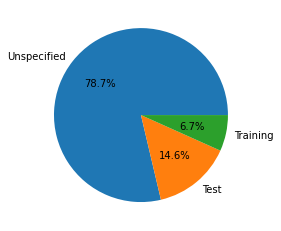

In [15]:
plt.pie([638507,118595,54355], labels=['Unspecified','Test','Training'], autopct='%.1f%%')
plt.show()

In [16]:
df.failureType.value_counts()

[]                 638507
[['none']]         147431
[['Edge-Ring']]      9680
[['Edge-Loc']]       5189
[['Center']]         4294
[['Loc']]            3593
[['Scratch']]        1193
[['Random']]          866
[['Donut']]           555
[['Near-full']]       149
Name: failureType, dtype: int64

In [17]:
df.failureType = df.failureType.replace('[]', 'Unspecified')
df.failureType = df.failureType.replace("[['none']]", 'none')
df.failureType = df.failureType.replace("[['Edge-Ring']]", 'Edge-Ring')
df.failureType = df.failureType.replace("[['Edge-Loc']]", 'Edge-Loc')
df.failureType = df.failureType.replace("[['Center']]", 'Center')
df.failureType = df.failureType.replace("[['Loc']]", 'Loc')
df.failureType = df.failureType.replace("[['Scratch']]", 'Scratch')
df.failureType = df.failureType.replace("[['Random']]", 'Random')
df.failureType = df.failureType.replace("[['Donut']]", 'Donut')
df.failureType = df.failureType.replace("[['Near-full']]",'Near-full')
df.failureType.value_counts()

Unspecified    638507
none           147431
Edge-Ring        9680
Edge-Loc         5189
Center           4294
Loc              3593
Scratch          1193
Random            866
Donut             555
Near-full         149
Name: failureType, dtype: int64

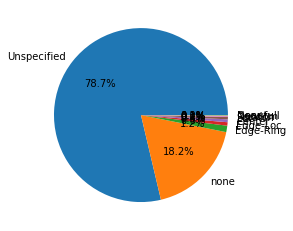

In [18]:
plt.pie([638507,147431,9680,5189,4294,3593,1193,866,555,149], 
        labels=['Unspecified','none','Edge-Ring','Edge-Loc','Center','Loc','Scratch','Random','Donut','Near-full'], autopct='%.1f%%')
plt.show()

미지정, 정상 제외한 결함 비율

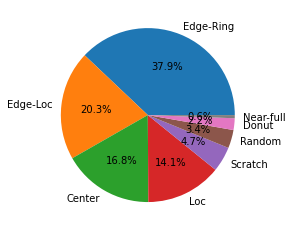

In [19]:
plt.pie([9680,5189,4294,3593,1193,866,555,149], 
        labels=['Edge-Ring','Edge-Loc','Center','Loc','Scratch','Random','Donut','Near-full'], autopct='%.1f%%')
plt.show()

In [35]:
df.waferMap[0].shape

(45, 48)

In [ ]:
df.waferMap[0]

In [ ]:
print('Unspecified', df.index[df['failureType'] == 'Unspecified'])
print('none', df.index[df['failureType'] == 'none'])
print('Edge-Ring', df.index[df['failureType'] == 'Edge-Ring'])
print('Edge-Loc', df.index[df['failureType'] == 'Edge-Loc'])
print('Center', df.index[df['failureType'] == 'Center'])
print('Loc', df.index[df['failureType'] == 'Loc'])
print('Scratch', df.index[df['failureType'] == 'Scratch'])
print('Random', df.index[df['failureType'] == 'Random'])
print('Donut', df.index[df['failureType'] == 'Donut'])
print('Near-full', df.index[df['failureType'] == 'Near-full'])

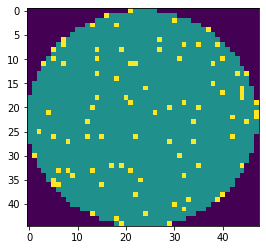

In [81]:
from PIL import Image
#image = Image.fromarray(df.waferMap[0])
#plt.imshow(image)
plt.imshow(df.waferMap[0])

In [ ]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[a])
    axes[-1].set_title(subplot_title) 
    plt.imshow(df.waferMap[a])
#fig.tight_layout()    
plt.show()

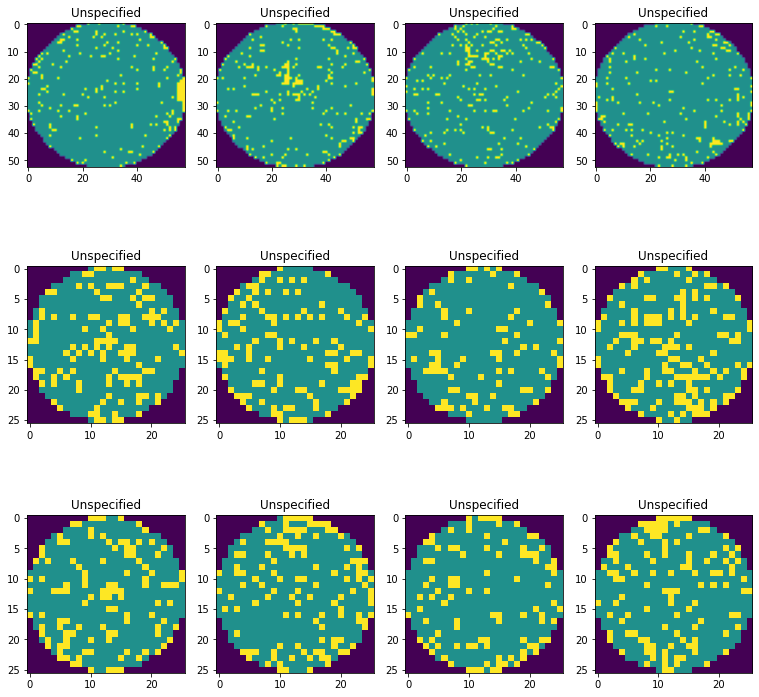

In [56]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Unspecified']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

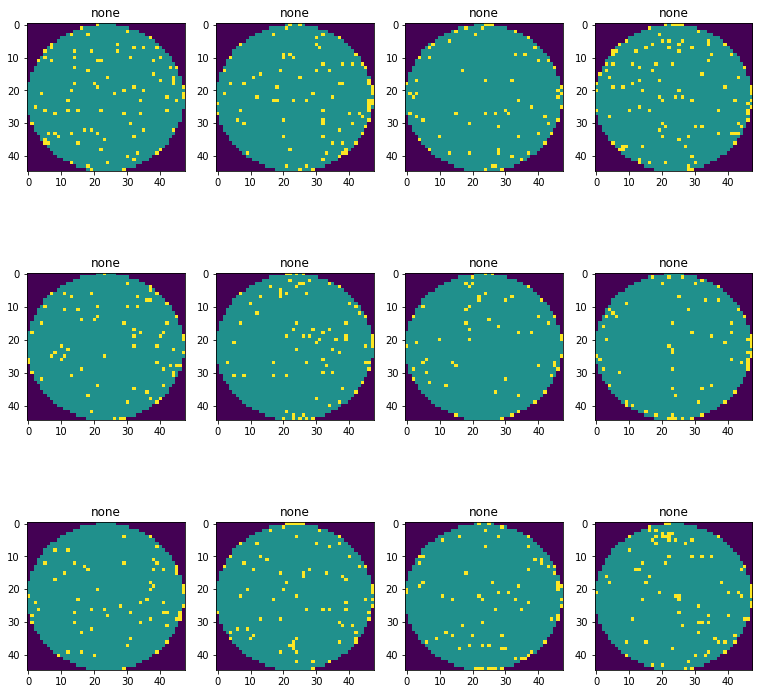

In [57]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'none']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

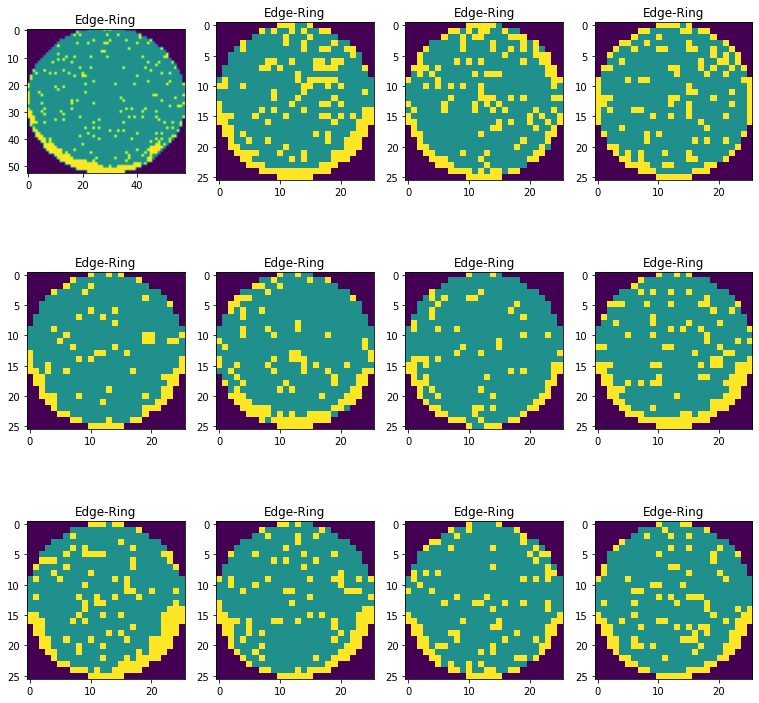

In [58]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Edge-Ring']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

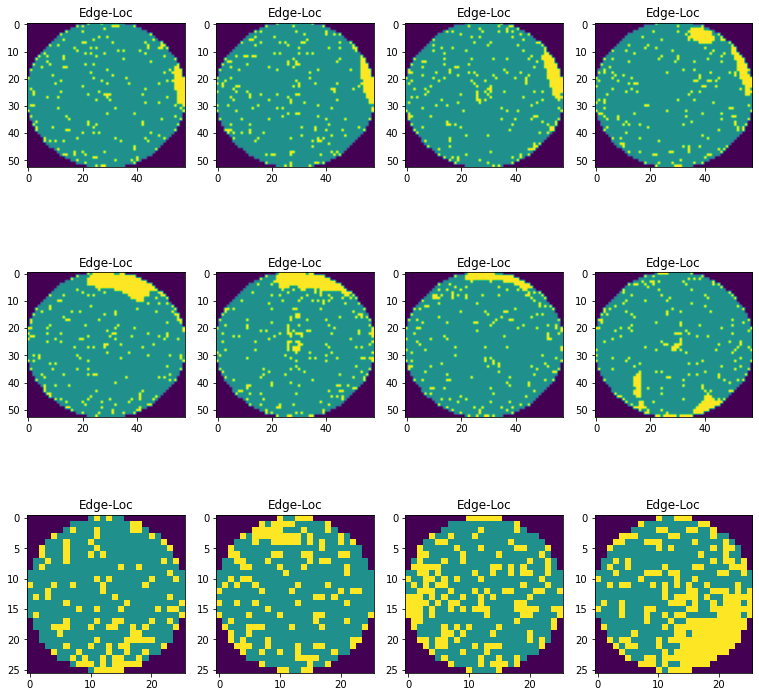

In [59]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Edge-Loc']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

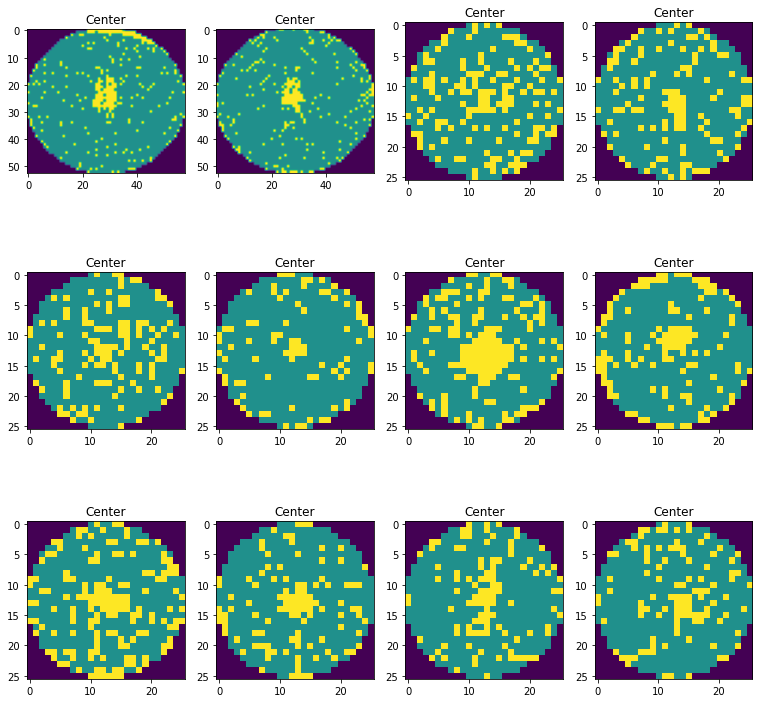

In [60]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Center']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

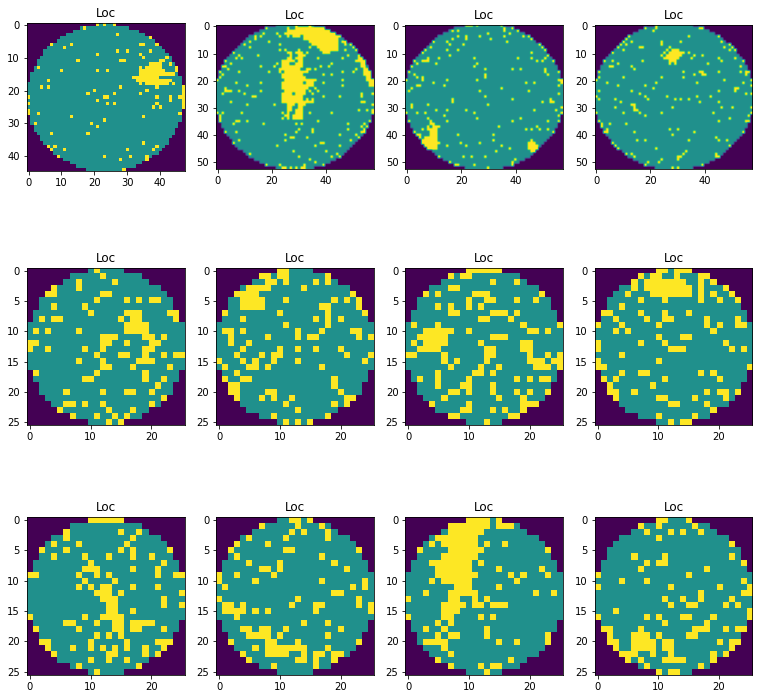

In [61]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Loc']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

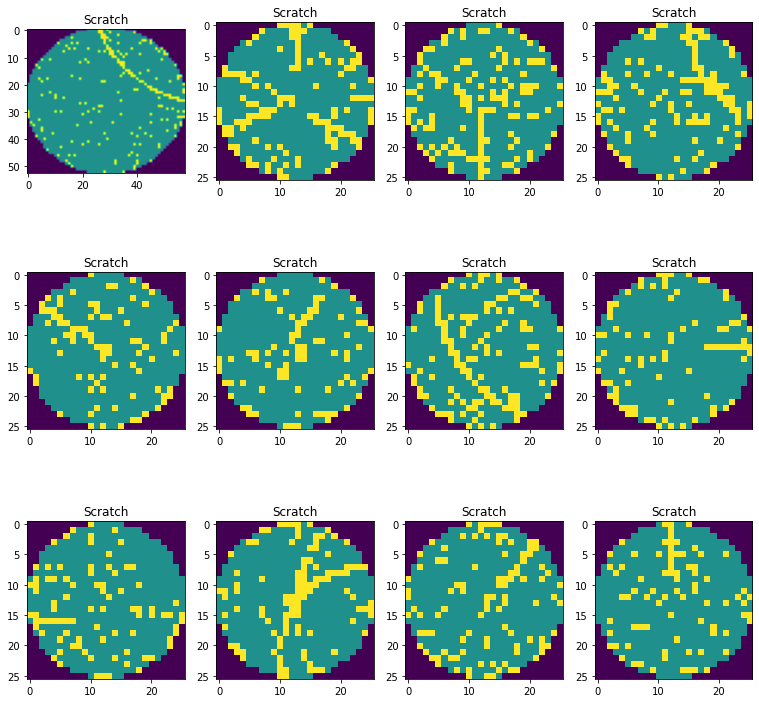

In [62]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Scratch']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

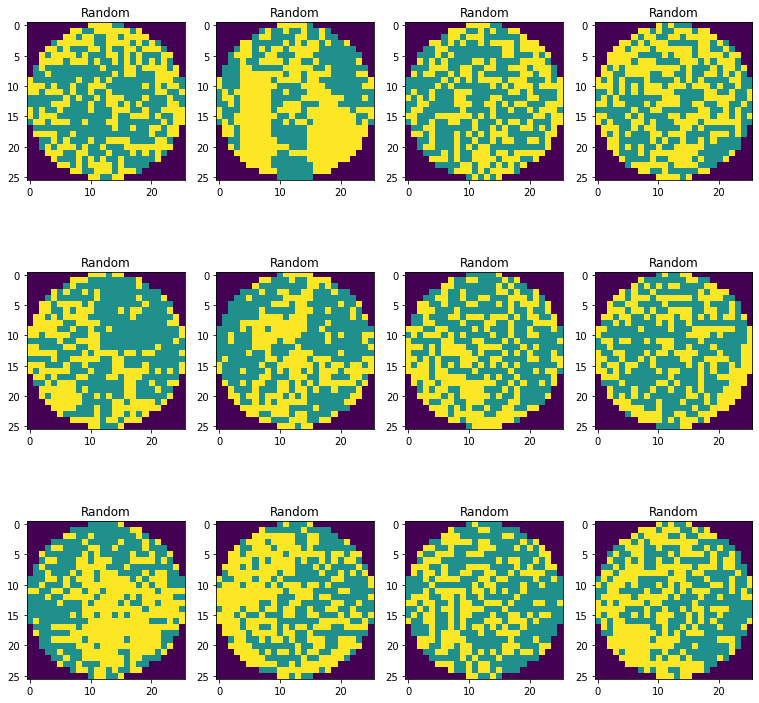

In [63]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Random']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

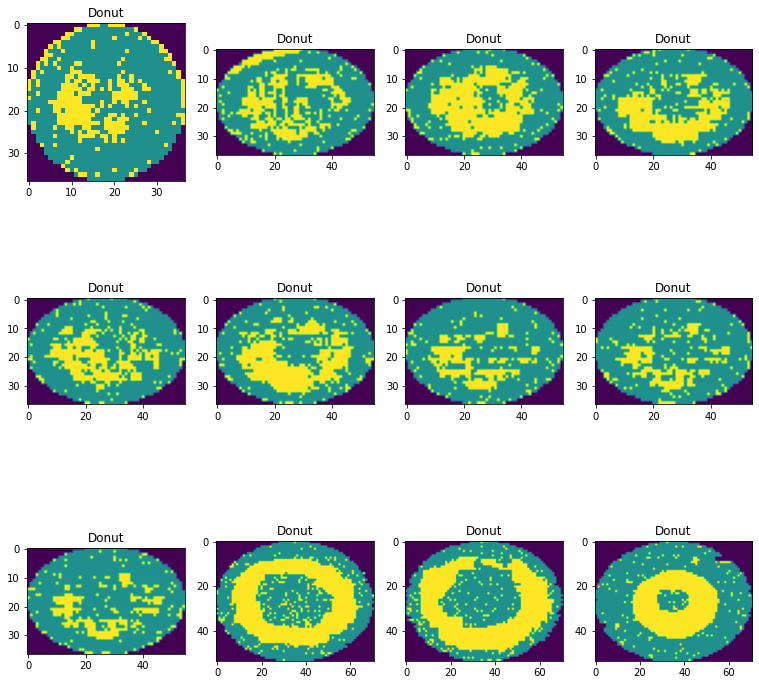

In [64]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Donut']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

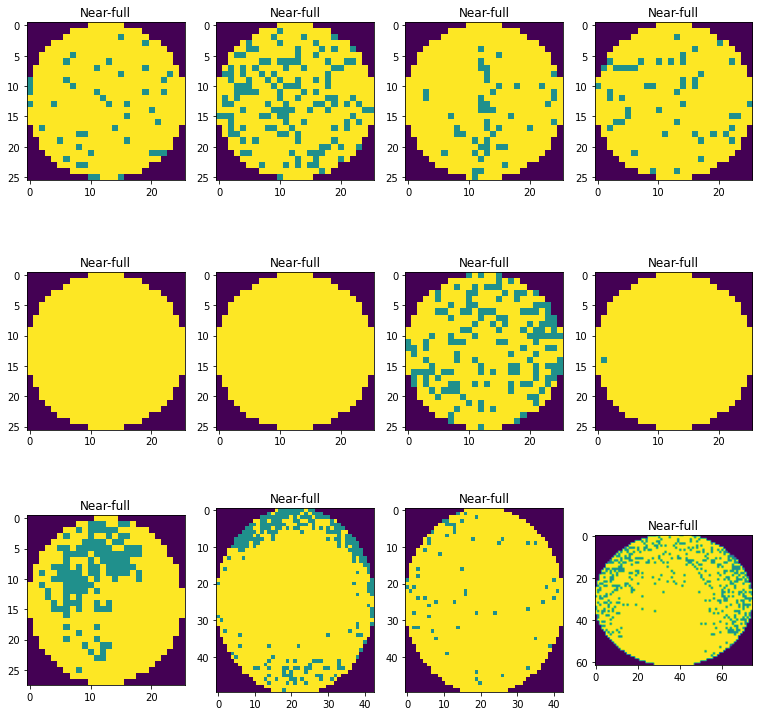

In [65]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Near-full']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
#fig.tight_layout()    
plt.show()

929

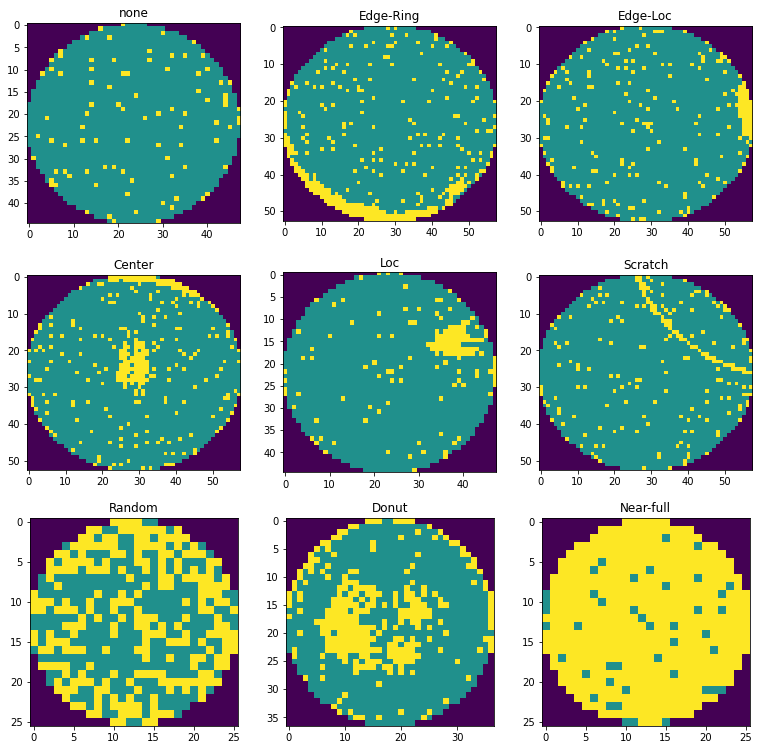

In [67]:
rows = 3
cols = 3
axes=[]
fig=plt.figure(figsize=(13,13))

axes.append( fig.add_subplot(rows, cols, 1) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'none'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'none'][0]])

axes.append( fig.add_subplot(rows, cols, 2) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Ring'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Edge-Ring'][0]])

axes.append( fig.add_subplot(rows, cols, 3) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Loc'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Edge-Loc'][0]])

axes.append( fig.add_subplot(rows, cols, 4) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Center'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Center'][0]])

axes.append( fig.add_subplot(rows, cols, 5) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Loc'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Loc'][0]])

axes.append( fig.add_subplot(rows, cols, 6) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Scratch'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Scratch'][0]])

axes.append( fig.add_subplot(rows, cols, 7) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Random'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Random'][0]])

axes.append( fig.add_subplot(rows, cols, 8) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Donut'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Donut'][0]])

axes.append( fig.add_subplot(rows, cols, 9) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Near-full'][0]])
axes[-1].set_title(subplot_title)
plt.imshow(df.waferMap[df.index[df['failureType'] == 'Near-full'][0]])

#fig.tight_layout()    
plt.show()

In [73]:
PPP = df.waferMap[0]
PPP = np.array(df.waferMap[0])
PPP = PPP.astype(dtype=np.float32)
PPP

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
PPP = df.waferMap[0]
PPP = Image.fromarray(df.waferMap[0])
PPP.save("PPP.png")
img = cv2.imread('PPP.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img, -1, kernel)

cv2_imshow(dst)

In [134]:
image = Image.open("PPP.png")
image.show()

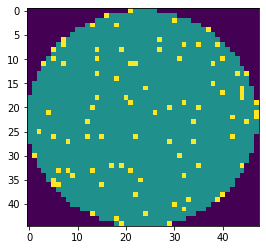

In [150]:
PPP = df.waferMap[0]
plt.imshow(PPP)
plt.savefig("PPP.png")

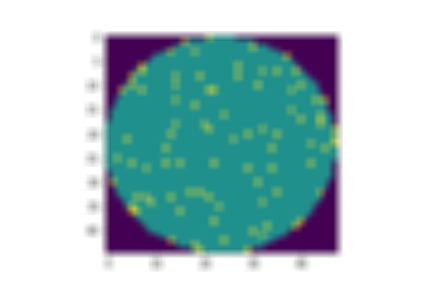

In [154]:
img = cv2.imread('PPP.png')
kernel = np.ones((10,10),np.float32)/100
dst = cv2.filter2D(img, -1, kernel)

cv2_imshow(dst)

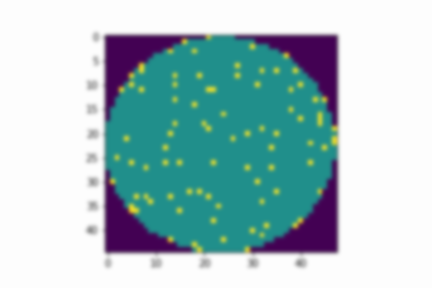

In [160]:
img = cv2.imread('PPP.png')
blur = cv2.GaussianBlur(img,(11,11),0)

cv2_imshow(blur)

In [ ]:
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 9)
cv2_imshow(median)

In [ ]:
PPP = df.waferMap[100]
#plt.imshow(PPP)
#plt.close()
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
#cv2_imshow(median)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
#plt.title('PPP') # 제목 추가
plt.axis("off") # 축 제거
#plt.show()

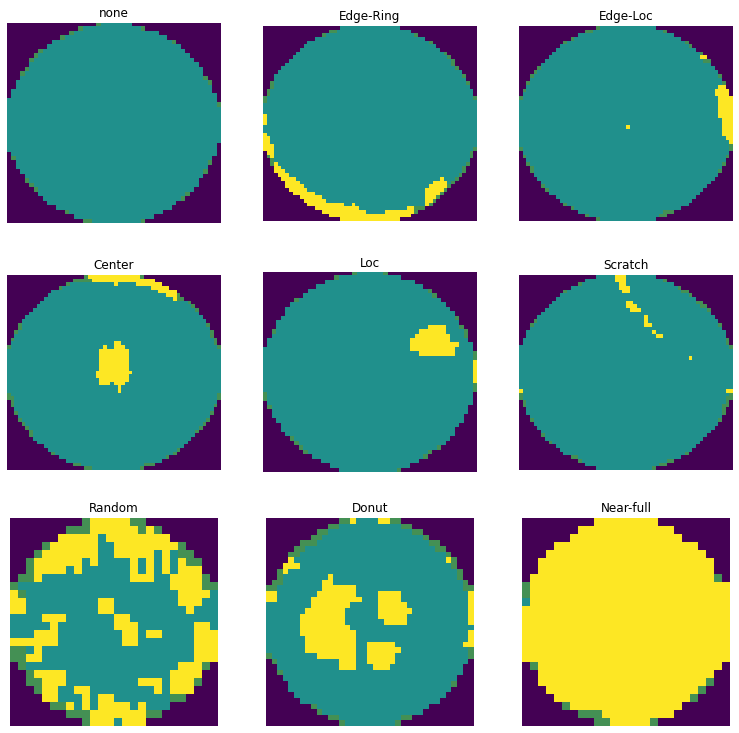

In [198]:
rows = 3
cols = 3
axes=[]
fig=plt.figure(figsize=(13,13))

axes.append( fig.add_subplot(rows, cols, 1) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'none'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'none'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)) #cv2랑 plt RGB 순서가 달라서 맞춰줌
plt.axis("off") # 축 제거

axes.append( fig.add_subplot(rows, cols, 2) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Ring'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Edge-Ring'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 3) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Loc'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Edge-Loc'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 4) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Center'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Center'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 5) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Loc'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Loc'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 6) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Scratch'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Scratch'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 7) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Random'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Random'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 8) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Donut'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Donut'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 9) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Near-full'][0]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Near-full'][0]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, 3)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

#fig.tight_layout()    
plt.show()

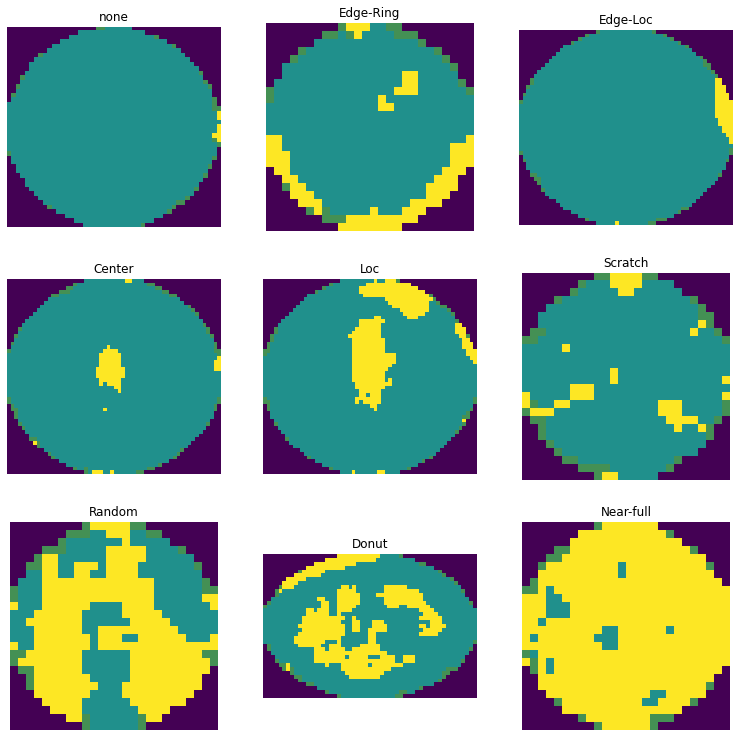

In [204]:
rows = 3
cols = 3
num = 1       
mbk = 3      # 미디안 블러 커널 사이즈
axes=[]
fig=plt.figure(figsize=(13,13))

axes.append( fig.add_subplot(rows, cols, 1) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'none'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'none'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB)) #cv2랑 plt RGB 순서가 달라서 맞춰줌
plt.axis("off") # 축 제거

axes.append( fig.add_subplot(rows, cols, 2) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Ring'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Edge-Ring'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 3) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Edge-Loc'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Edge-Loc'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 4) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Center'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Center'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 5) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Loc'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Loc'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 6) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Scratch'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Scratch'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 7) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Random'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Random'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 8) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Donut'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Donut'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 9) )
subplot_title=(df.failureType[df.index[df['failureType'] == 'Near-full'][num]])
axes[-1].set_title(subplot_title)
PPP = df.waferMap[df.index[df['failureType'] == 'Near-full'][num]]
plt.imsave("PPP.png",PPP)
img = cv2.imread('PPP.png')
median = cv2.medianBlur(img, mbk)
plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
plt.axis("off")

#fig.tight_layout()    
plt.show()

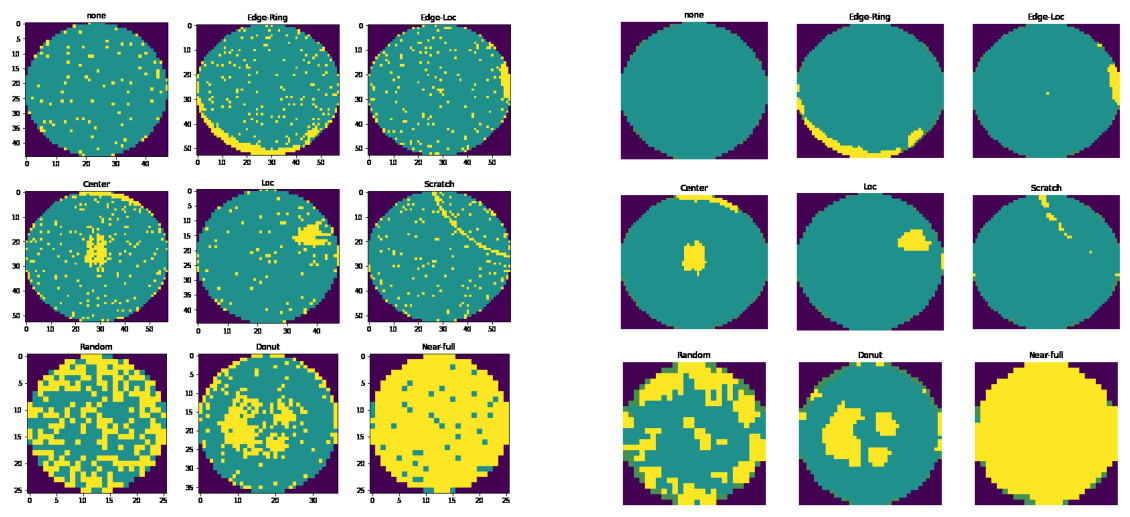

In [213]:
bab = cv2.imread('/content/gdrive/MyDrive/Original.png')
baa = cv2.imread('/content/gdrive/MyDrive/MedianBlur.png')

rows = 1
cols = 2
axes=[]
fig=plt.figure(figsize=(20,20))

axes.append( fig.add_subplot(rows, cols, 1) )
plt.imshow(cv2.cvtColor(bab, cv2.COLOR_BGR2RGB))
plt.axis("off")

axes.append( fig.add_subplot(rows, cols, 2) )
plt.imshow(cv2.cvtColor(baa, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.show()

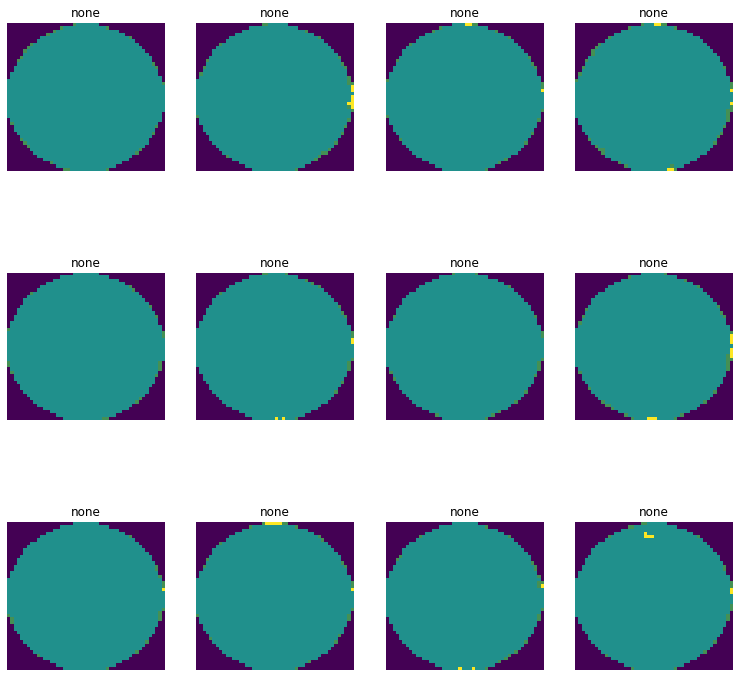

In [214]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'none']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

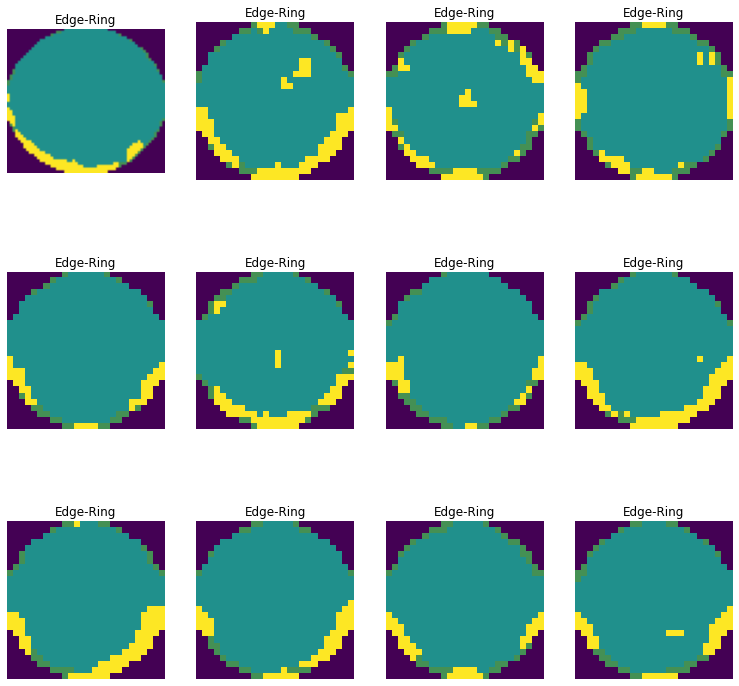

In [215]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Edge-Ring']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

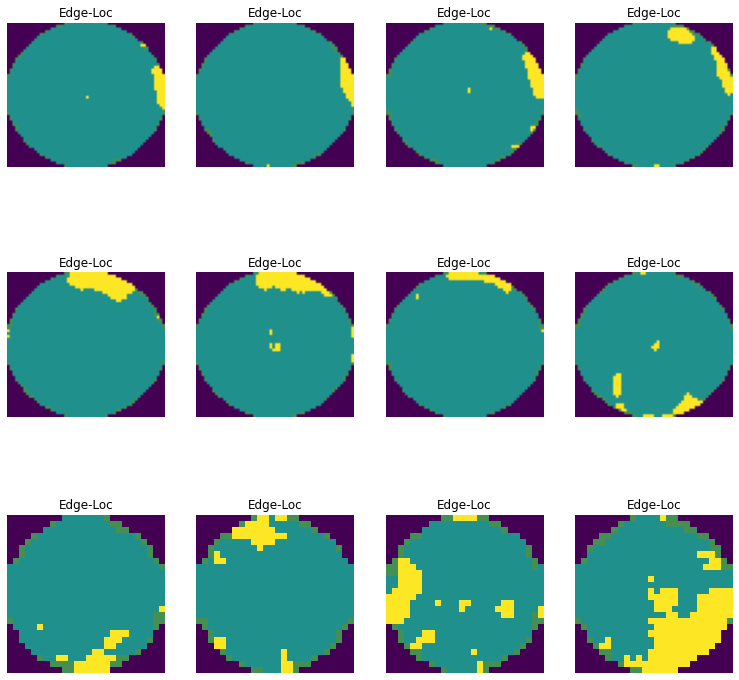

In [216]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Edge-Loc']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

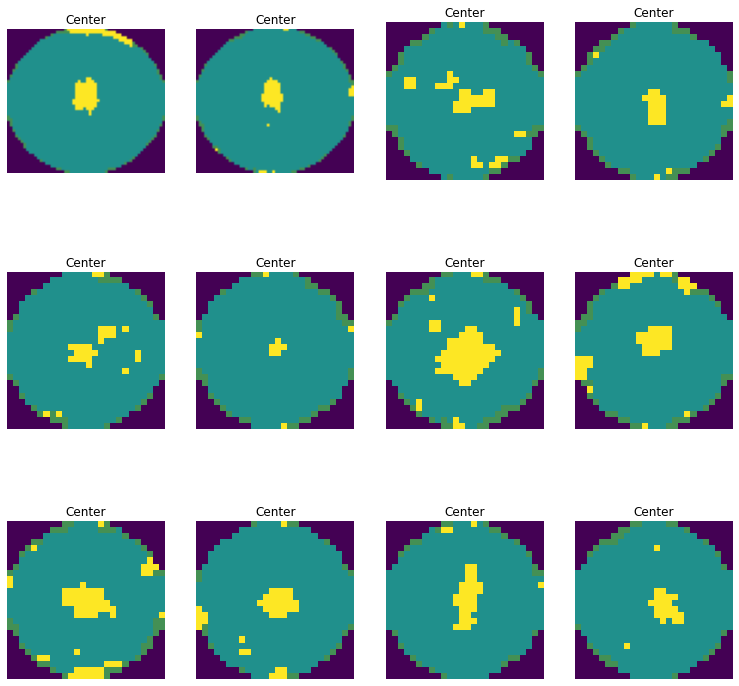

In [217]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Center']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

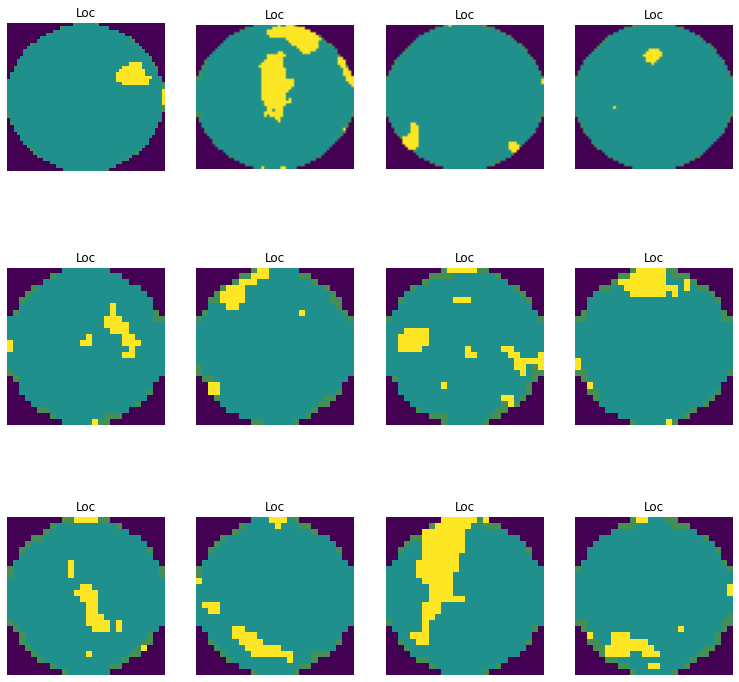

In [218]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Loc']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

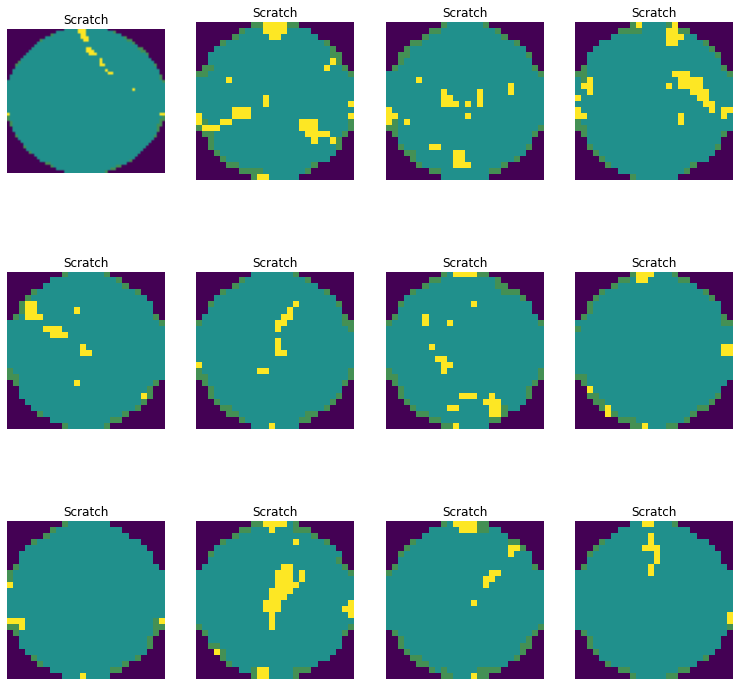

In [219]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Scratch']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

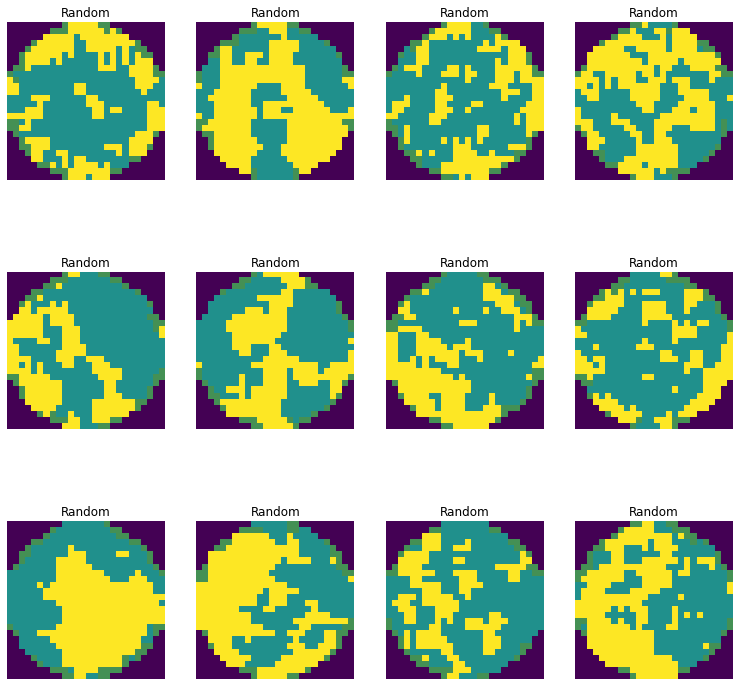

In [220]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Random']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

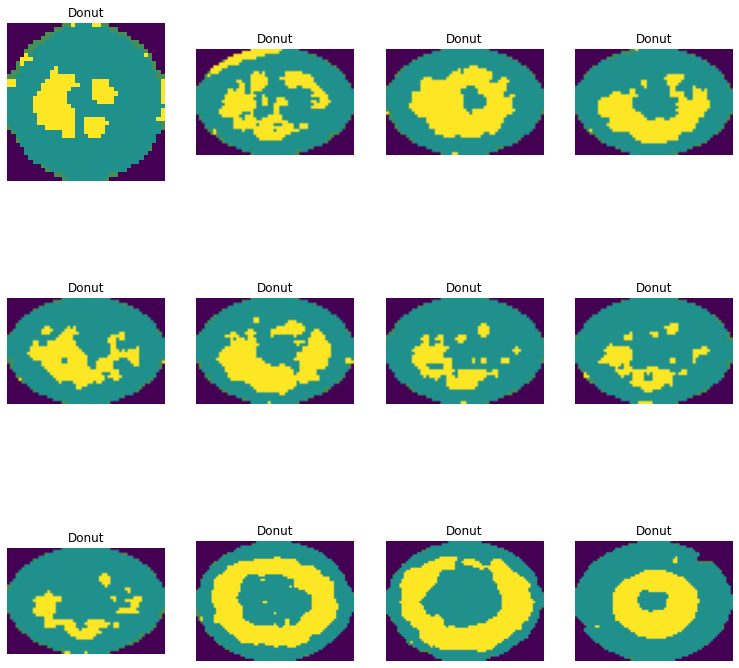

In [221]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Donut']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()

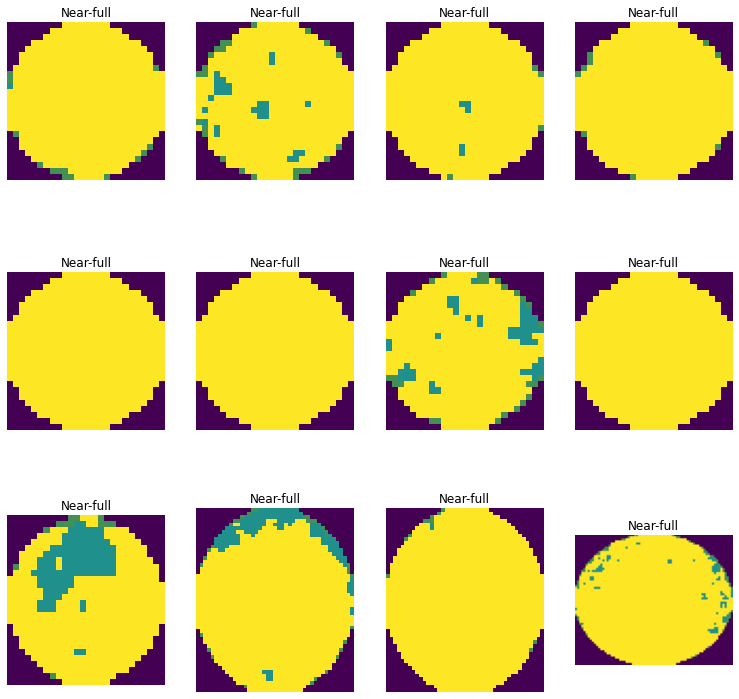

In [222]:
rows = 3
cols = 4
axes=[]
fig=plt.figure(figsize=(13,13))
index = df.index[df['failureType'] == 'Near-full']

for a in range(rows*cols):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    subplot_title=(df.failureType[index[a]])
    axes[-1].set_title(subplot_title)
    plt.imshow(df.waferMap[index[a]])
    PPP = df.waferMap[index[a]]
    plt.imsave("PPP.png",PPP)
    img = cv2.imread('PPP.png')
    median = cv2.medianBlur(img, mbk)
    plt.imshow(cv2.cvtColor(median, cv2.COLOR_BGR2RGB))
    plt.axis("off")
#fig.tight_layout()    
plt.show()